## 1. Carga de librerías necesarias para implementación

In [876]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots
from sklearn.decomposition import PCA

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
print(os.getcwd()) # dice donde cree que es el repositorio donde esta trabajando para hacer el path relativo funcional

c:\Users\User\Lab1


## 2. Cargar los datos

In [877]:
df_movies = pd.read_csv('data/MovieAlpes_data.csv', sep=';', encoding='utf-8')
df_algoritmo2=pd.read_csv('data/MovieAlpes_data.csv', sep=';', encoding='utf-8')

## 3. Entendimiento de los datos 

### 3.1. Perfilamiento de datos

In [878]:
df_movies.shape

(7471, 18)

In [879]:
df_movies.head()

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre
0,1,1,tt0103064,movie,Terminator 2: Judgment Day,0.0,1991.0,137,8.6,1128166.0,17.0,US,en,dvd,\N,0.0,Action,Sci-Fi
1,10,17,tt0231050,tvSeries,ToransufÃ´mÃ¢: KÃ¢robotto,0.0,2000.0,22,6.6,577.0,16.0,US,en,alternative,\N,0.0,Action,Adventure
2,13,23,tt0253474,movie,The Pianist,0.0,2002.0,150,8.5,860569.0,7.0,US,en,imdbDisplay,\N,0.0,Biography,Drama
3,21,55,tt0369339,movie,Collateral,0.0,2004.0,120,7.5,417391.0,6.0,US,en,imdbDisplay,\N,0.0,Action,Crime
4,28,87,tt0439547,movie,2 Filhos de Francisco: A HistÃ³ria de ZezÃ© di...,0.0,2005.0,132,6.9,5946.0,5.0,US,en,imdbDisplay,\N,0.0,Biography,Drama


In [880]:
# Revisar las características de los datos: completitud y tipo de dat
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                7471 non-null   int64  
 1   index            7471 non-null   int64  
 2   tconst           7471 non-null   object 
 3   titleType        7471 non-null   object 
 4   originalTitle    7471 non-null   object 
 5   isAdult          7470 non-null   float64
 6   startYear        7470 non-null   float64
 7   runtimeMinutes   7470 non-null   object 
 8   averageRating    7470 non-null   float64
 9   numVotes         7470 non-null   float64
 10  ordering         7470 non-null   float64
 11  region           7470 non-null   object 
 12  language         7470 non-null   object 
 13  types            7470 non-null   object 
 14  attributes       7470 non-null   object 
 15  isOriginalTitle  7470 non-null   float64
 16  main_genre       7470 non-null   object 
 17  secondary_genr

In [881]:
# Resumen de los estadisticos de las variables numéricas
df_movies.describe()

,#,index,isAdult,startYear,averageRating,numVotes,ordering,isOriginalTitle
count,7471.000000,7471.000000,7470.0,7470.000000,7470.000000,7.470000e+03,7470.000000,7470.0
mean,4043.482666,5440.458439,0.0,2013.157296,7.475676,7.282830e+04,16.567604,0.0
std,2192.753689,2752.820924,0.0,6.979151,2.771444,1.640233e+05,12.761147,0.0
min,1.000000,1.000000,0.0,1990.000000,6.500000,1.000000e+01,1.000000,0.0
25%,2152.500000,3073.500000,0.0,2008.000000,6.900000,6.265250e+03,6.000000,0.0
50%,4033.000000,5421.000000,0.0,2015.000000,7.300000,1.527900e+04,14.000000,0.0
75%,5914.500000,7641.500000,0.0,2019.000000,7.800000,5.641975e+04,24.000000,0.0
max,7849.000000,10274.000000,0.0,2023.000000,92.000000,2.197234e+06,119.000000,0.0


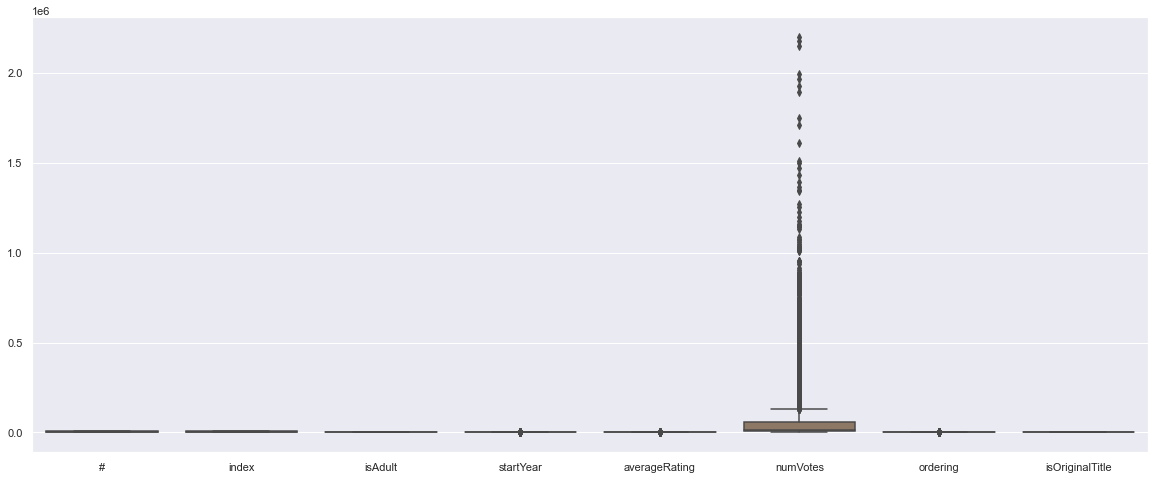

In [882]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies, orient="v")

In [883]:
#Separación de las variables float de las int
name_cols_float = df_movies.select_dtypes(include = ['float']).columns
print("Columnas con tipo de dato 'float':", name_cols_float)

name_cols_int = df_movies.select_dtypes(include = ['int64']).columns
print("Columnas con tipo de dato 'int64':", name_cols_int)


Columnas con tipo de dato 'float': Index(['isAdult', 'startYear', 'averageRating', 'numVotes', 'ordering',
       'isOriginalTitle'],
      dtype='object')
Columnas con tipo de dato 'int64': Index(['#', 'index'], dtype='object')


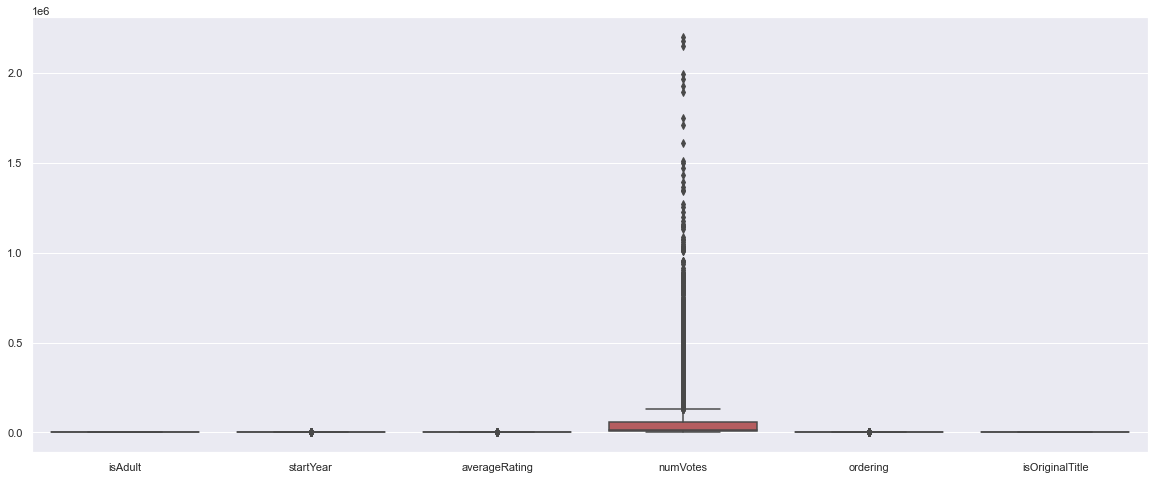

In [884]:
#Visualización de todas las variables numéricas de tipo Float
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies[name_cols_float], orient="v")

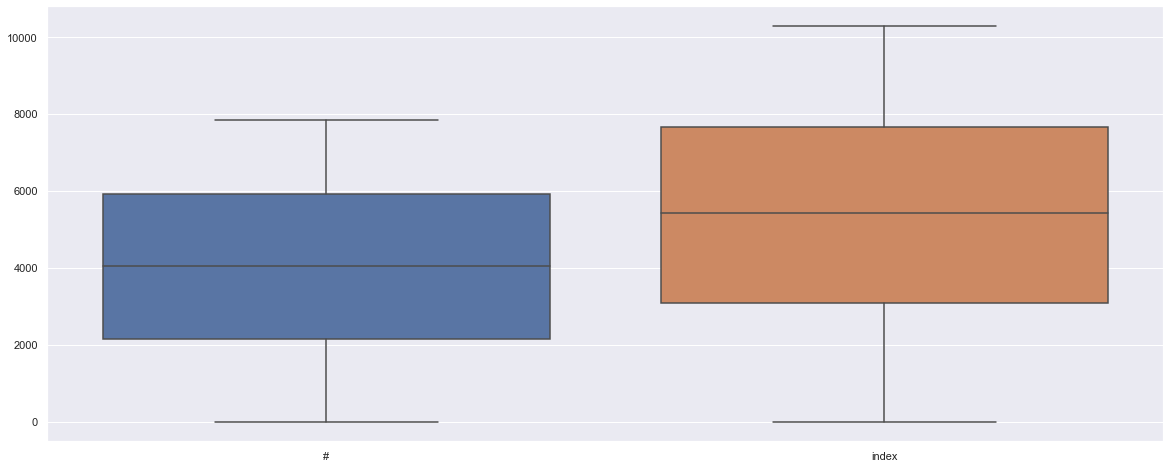

In [885]:
#Visualización de todas las variables numéricas de tipo int
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies[name_cols_int], orient="v")

In [886]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_movies.select_dtypes(include = ['object']).columns
print("Columnas con tipo de dato 'object' (generalmente textuales):", name_cols_non_number)

Columnas con tipo de dato 'object' (generalmente textuales): Index(['tconst', 'titleType', 'originalTitle', 'runtimeMinutes', 'region',
       'language', 'types', 'attributes', 'main_genre', 'secondary_genre'],
      dtype='object')


In [887]:
#Revisar el contenido de las variables que no son numéricas, en este caso son categóricas
df_movies[name_cols_non_number].describe()

,tconst,titleType,originalTitle,runtimeMinutes,region,language,types,attributes,main_genre,secondary_genre
count,7471,7471,7471,7470,7470,7470,7470,7470,7470,7470
unique,7466,7,7290,362,4,1,5,1,22,26
top,tt0386741,movie,Candy,60,IN,en,imdbDisplay,\N,Drama,Drama
freq,2,4673,3,534,5590,7470,7395,7470,1767,2428


Distribución de valores para 'tconst':
tt0386741     2
tt0395843     2
tt12443930    2
tt1535109     2
tt0390538     2
Name: tconst, dtype: int64


Distribución de valores para 'titleType':
movie           4673
tvSeries        2340
tvMiniSeries     379
tvMovie           70
MOVIE              5
Name: titleType, dtype: int64


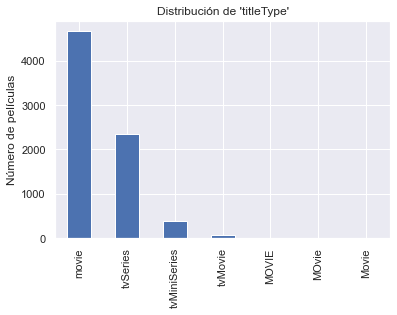



Distribución de valores para 'originalTitle':
Candy        3
Life         3
Monster      3
Limitless    3
Taken        3
Name: originalTitle, dtype: int64


Distribución de valores para 'runtimeMinutes':
60    534
30    340
45    184
22    138
43    114
Name: runtimeMinutes, dtype: int64


Distribución de valores para 'region':
IN    5590
CA    1782
US      94
GB       4
Name: region, dtype: int64


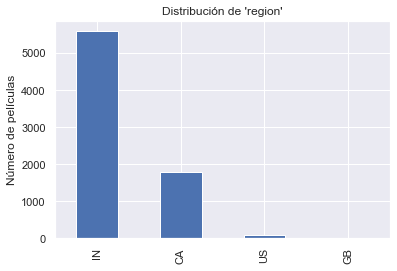



Distribución de valores para 'language':
en    7470
Name: language, dtype: int64


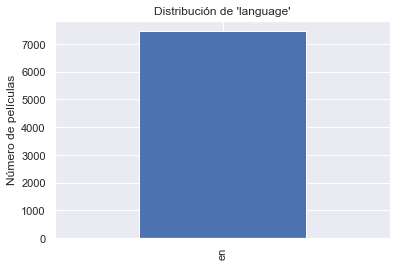



Distribución de valores para 'types':
imdbDisplay    7395
working          38
alternative      24
festival         11
dvd               2
Name: types, dtype: int64


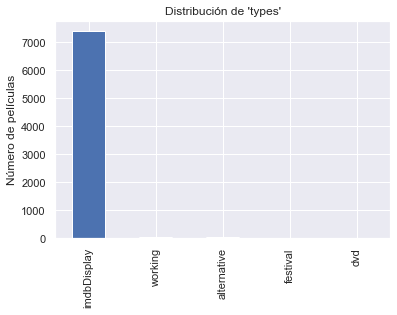



Distribución de valores para 'attributes':
\N    7470
Name: attributes, dtype: int64


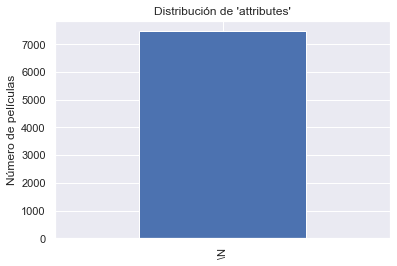



Distribución de valores para 'main_genre':
Drama        1767
Comedy       1615
Action       1571
Crime         867
Biography     597
Name: main_genre, dtype: int64


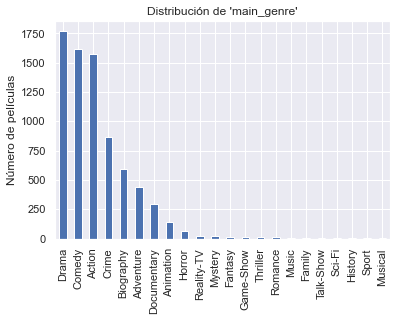



Distribución de valores para 'secondary_genre':
Drama        2428
No tiene     1052
Crime         634
Adventure     574
Romance       453
Name: secondary_genre, dtype: int64


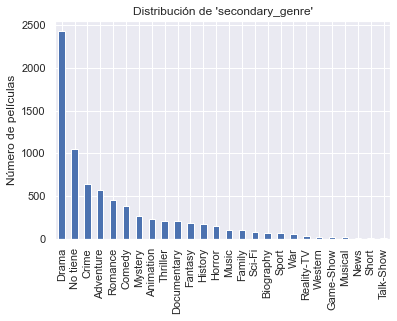

In [888]:
# Lista de columnas a analizar
cols_to_analyze = ['tconst', 'titleType', 'originalTitle', 'runtimeMinutes', 'region', 'language', 'types', 'attributes', 'main_genre', 'secondary_genre']

for col in cols_to_analyze:
    print(f"Distribución de valores para '{col}':")
    value_counts = df_movies[col].value_counts()
    print(value_counts.head())  # Mostrar los 5 valores más comunes
    
    # Graficar si la columna tiene menos de 30 valores únicos para mejor visualización
    if len(value_counts) < 30:
        value_counts.plot(kind='bar')
        plt.title(f"Distribución de '{col}'")
        plt.ylabel('Número de películas')
        plt.show()
    
    print("\n")  # Separación entre análisis


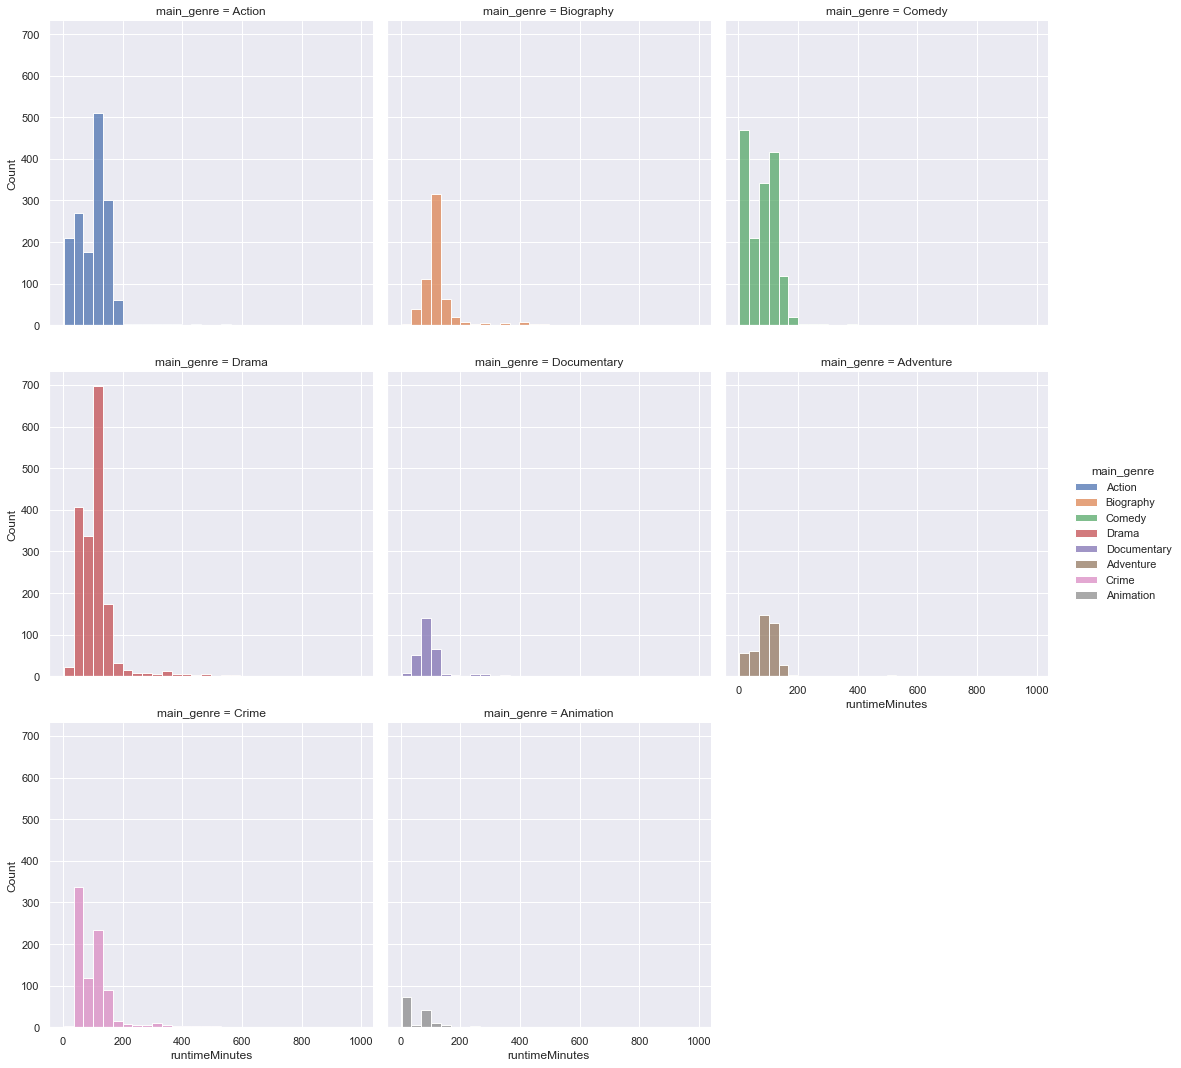

In [889]:
# Reemplaza '\\N' por NaN
df_movies['runtimeMinutes'].replace('\\N', np.nan, inplace=True)

# Convierte a float
df_movies['runtimeMinutes'] = df_movies['runtimeMinutes'].astype(float)

# Contamos cuántas películas hay por cada género
genre_counts = df_movies['main_genre'].value_counts()

# Filtramos los géneros que tienen, por ejemplo, más de 100 películas
selected_genres = genre_counts[genre_counts > 100].index

# Filtra el DataFrame para incluir solo los géneros seleccionados
filtered_movies = df_movies[df_movies['main_genre'].isin(selected_genres)]

# Grafica las distribuciones para estos géneros
sns.displot(data=filtered_movies, x="runtimeMinutes", hue="main_genre", col="main_genre", col_wrap=3, bins=30)
plt.show()


In [890]:
# Selecciona las columnas de tipo 'object'
name_cols_object = df_movies.select_dtypes(include=['object']).columns

# Consulta una muestra de 15 registros de esas columnas
df_movies[name_cols_object].sample(15)


,tconst,titleType,originalTitle,region,language,types,attributes,main_genre,secondary_genre
6996,tt3205376,movie,Slow West,CA,en,imdbDisplay,\N,Action,Adventure
7437,tt8800266,movie,Ema,CA,en,imdbDisplay,\N,Drama,Music
6335,tt10228230,tvMiniSeries,Quiz,CA,en,imdbDisplay,\N,Crime,Drama
1471,tt1045772,movie,I Love You Phillip Morris,IN,en,imdbDisplay,\N,Biography,Comedy
1667,tt11233960,movie,The Unforgivable,IN,en,imdbDisplay,\N,Crime,Drama
3471,tt2400463,movie,The Invitation,IN,en,imdbDisplay,\N,Drama,Horror
5229,tt8115900,movie,The Bad Guys,IN,en,imdbDisplay,\N,Adventure,Animation
246,tt0180073,movie,Quills,IN,en,imdbDisplay,\N,Biography,Drama
5937,tt0330243,movie,Dzien swira,CA,en,imdbDisplay,\N,Comedy,Drama
1126,tt0772145,tvSeries,Wolverine and the X-Men,IN,en,imdbDisplay,\N,Action,Adventure


### 3.2. Análisis de calidad de datos


### 3.2.1 Completitud - Análisis de valores nulos o vacíos


In [891]:
# Cálculo de porcentaje de valores nulos por columna en df_movies
((df_movies.isnull().sum() / df_movies.shape[0]) * 100).sort_values(ascending=False)


runtimeMinutes     1.325124
secondary_genre    0.013385
ordering           0.013385
isAdult            0.013385
startYear          0.013385
main_genre         0.013385
numVotes           0.013385
averageRating      0.013385
region             0.013385
language           0.013385
types              0.013385
attributes         0.013385
isOriginalTitle    0.013385
originalTitle      0.000000
titleType          0.000000
tconst             0.000000
index              0.000000
#                  0.000000
dtype: float64

En el DataFrame df_movies, la columna runtimeMinutes presenta un 1.325124% de valores nulos, lo que sugiere que hay algunas películas o series sin información sobre su duración. Por otro lado, las columnas numVotes, ordering, main_genre, isOriginalTitle, attributes, types, language, region, secondary_genre, averageRating, startYear y isAdult muestran un 0.013385% de valores nulos, indicando que raramente se carece de esta información en estas columnas. Las columnas index, originalTitle, titleType, tconst y # están completamente llenas sin ningún valor faltante. Con esto podemos concluir que en cuanto a completitud los datos tienen una muy buena calidad.

### 3.2.2 Unicidad

In [892]:
duplicated_movies = df_movies.duplicated(keep=False).sum()
print(f"El número de registros duplicados en df_movies es: {duplicated_movies}")

El número de registros duplicados en df_movies es: 6


A comparacion con el tamano total de los datos se puede ver que tienen muy pocos registros duplicados por lo que, aunque es importante eliminarlos para mejorar la calidad de los analisis, se podrian calificar los datos como muy buenos en cuanto a unicidad.

### 3.2.3 Consistencia


In [893]:
# Columna: tconst
print("Valores para la columna 'tconst':")
print(df_movies['tconst'].value_counts().head(10))
print("-" * 50)


Valores para la columna 'tconst':
tt0386741     2
tt0395843     2
tt12443930    2
tt1535109     2
tt0390538     2
tt14479480    1
tt5962210     1
tt0835434     1
tt2432604     1
tt17513352    1
Name: tconst, dtype: int64
--------------------------------------------------


In [894]:
# Columna: titleType
print("Valores para la columna 'titleType':")
print(df_movies['titleType'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'titleType':
movie           4673
tvSeries        2340
tvMiniSeries     379
tvMovie           70
MOVIE              5
MOvie              3
Movie              1
Name: titleType, dtype: int64
--------------------------------------------------


In [895]:
# Columna: originalTitle
print("Valores para la columna 'originalTitle':")
print(df_movies['originalTitle'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'originalTitle':
Candy                   3
Life                    3
Monster                 3
Limitless               3
Taken                   3
Beauty and the Beast    3
Home                    3
Wanted                  3
In the Dark             2
The Missing             2
Name: originalTitle, dtype: int64
--------------------------------------------------


In [896]:
# Columna: runtimeMinutes
print("Valores para la columna 'runtimeMinutes':")
print(df_movies['runtimeMinutes'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'runtimeMinutes':
60.0     534
30.0     340
45.0     184
22.0     138
43.0     114
90.0     112
105.0    110
42.0     108
100.0    100
106.0     99
Name: runtimeMinutes, dtype: int64
--------------------------------------------------


In [897]:
# Columna: region
print("Valores para la columna 'region':")
print(df_movies['region'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'region':
IN    5590
CA    1782
US      94
GB       4
Name: region, dtype: int64
--------------------------------------------------


In [898]:
# Columna: language
print("Valores para la columna 'language':")
print(df_movies['language'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'language':
en    7470
Name: language, dtype: int64
--------------------------------------------------


In [899]:
# Columna: types
print("Valores para la columna 'types':")
print(df_movies['types'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'types':
imdbDisplay    7395
working          38
alternative      24
festival         11
dvd               2
Name: types, dtype: int64
--------------------------------------------------


In [900]:
# Columna: attributes
print("Valores para la columna 'attributes':")
print(df_movies['attributes'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'attributes':
\N    7470
Name: attributes, dtype: int64
--------------------------------------------------


In [901]:
# Columna: main_genre
print("Valores para la columna 'main_genre':")
print(df_movies['main_genre'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'main_genre':
Drama          1767
Comedy         1615
Action         1571
Crime           867
Biography       597
Adventure       440
Documentary     297
Animation       144
Horror           63
Reality-TV       24
Name: main_genre, dtype: int64
--------------------------------------------------


In [902]:
# Columna: secondary_genre
print("Valores para la columna 'secondary_genre':")
print(df_movies['secondary_genre'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'secondary_genre':
Drama          2428
No tiene       1052
Crime           634
Adventure       574
Romance         453
Comedy          383
Mystery         259
Animation       224
Thriller        209
Documentary     200
Name: secondary_genre, dtype: int64
--------------------------------------------------


La columna tconst parece tener muy pocas repeticiones por lo que probablemente sea alguna referencia especial. Ahora bien, referiendonos a los datos podemos ver que la columna titleType sufre de problemas de consistencia con el nombramiento de movie. El resto de columnas parecen tener buena consistencia, sin embargo arreglar la columna de titleType mejorara los resultados de analisis al evitar problemas.

### 3.2.4 Validez


Se verifica el valor de cada uno de los atributos del dataset.

In [903]:
df_movies.describe()

,#,index,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,isOriginalTitle
count,7471.000000,7471.000000,7470.0,7470.000000,7372.000000,7470.000000,7.470000e+03,7470.000000,7470.0
mean,4043.482666,5440.458439,0.0,2013.157296,100.777130,7.475676,7.282830e+04,16.567604,0.0
std,2192.753689,2752.820924,0.0,6.979151,65.016795,2.771444,1.640233e+05,12.761147,0.0
min,1.000000,1.000000,0.0,1990.000000,3.000000,6.500000,1.000000e+01,1.000000,0.0
25%,2152.500000,3073.500000,0.0,2008.000000,60.000000,6.900000,6.265250e+03,6.000000,0.0
50%,4033.000000,5421.000000,0.0,2015.000000,101.000000,7.300000,1.527900e+04,14.000000,0.0
75%,5914.500000,7641.500000,0.0,2019.000000,122.000000,7.800000,5.641975e+04,24.000000,0.0
max,7849.000000,10274.000000,0.0,2023.000000,990.000000,92.000000,2.197234e+06,119.000000,0.0


In [904]:
df_movies['isAdult'].unique

<bound method Series.unique of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7466    0.0
7467    0.0
7468    0.0
7469    0.0
7470    0.0
Name: isAdult, Length: 7471, dtype: float64>

Se evidencia que la columna isAdult() no posee valores unicos, y todos los registros tienen un valor de 0.0

In [905]:
df_movies['isAdult']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7466    0.0
7467    0.0
7468    0.0
7469    0.0
7470    0.0
Name: isAdult, Length: 7471, dtype: float64

Verificar que los valores de averageRating se encuentren en el debido rango: [0,10], y contar los valores que no se encuentren en el rango

In [906]:
conteo_averageRating = (~((df_movies['averageRating'] >= 0) & (df_movies['averageRating'] <= 10))).sum()
conteo_averageRating



14

Estudiar valores de atributes.

In [907]:
df_movies['attributes'].unique()

array(['\\N', nan], dtype=object)

Verificar que el language los datos, sea ingles para todos los casos

In [908]:
df_movies['language']

0       en
1       en
2       en
3       en
4       en
        ..
7466    en
7467    en
7468    en
7469    en
7470    en
Name: language, Length: 7471, dtype: object

Verificar que la region se encuentre en las mencionadas

In [909]:
regionesInvalidas = (~df_movies['region'].isin(['IN', 'US', 'CA', 'GB'])).sum()
regionesInvalidas

1

Contar las filas que no cumplen con el formato enunciado (Movie, tvSeries,tvMiniSeries,tvMovie )

In [910]:
#Convertir los valores a minusculas
df_movies['titleType'] = df_movies['titleType'].str.lower()

invalidoTitleType = df_movies[~df_movies['titleType'].isin(['movie', 'tvseries', 'tvminiseries', 'tvmovie'])]
invalidoTitleType
#Todos cumplen con ello

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre


## 4. Iteración 1. Primer modelo

### 4.1 Preparar los datos
A nivel de preparación de datos debemos fijarnos en:
- A. Correcciones relacionadas con problemas de calidad de dato: nulos, duplicados, inconsistencia, diferencia de formatos, etc.
- B. Preparación relacionada con la tarea de aprendizaje
    - Selección de columnas a incluir de acuerdo con la tarea de aprendizaje a realizar y el conocimiento del contexto del negocio
    - ...
- C. Preparación de acuerdo con el algoritmo a utilizar, en este caso K-means
    Al revisar k-means vemos que el algoritmo trabaja únicamente con datos numéricos, y no nulos así que si vamos a incluir datos categóricos debemos transformarlos a numéricos y si tenemos datos nulos debemos transformalos y en el peor escenario retirarlos del modelo ya sea la fila que los incluye o toda la columna si el porcentaje de estos valores es alto.

## 5. Iteración 1. Segundo Modelo (DBScan)

### 5.1 Preparar los datos
A nivel de preparación de datos debemos fijarnos en:
- A. Correcciones relacionadas con problemas de calidad de dato: nulos, duplicados, inconsistencia, diferencia de formatos, etc.
- B. Preparación relacionada con la tarea de aprendizaje
    - Selección de columnas a incluir de acuerdo con la tarea de aprendizaje a realizar y el conocimiento del contexto del negocio
    - ...
- C. Preparación de acuerdo con el algoritmo a utilizar, en este caso K-means
    Al revisar k-means vemos que el algoritmo trabaja únicamente con datos numéricos, y no nulos así que si vamos a incluir datos categóricos debemos transformarlos a numéricos y si tenemos datos nulos debemos transformalos y en el peor escenario retirarlos del modelo ya sea la fila que los incluye o toda la columna si el porcentaje de estos valores es alto.

Se eliminan las filas, las cuales se evidencia que poseen un alto nivel de apariciones por alguna variable tales como atributes o isAdult, o language o indices

In [911]:
columnasEliminar = ['#', 'index', 'originalTitle', 'isAdult', 'language', 'attributes', 'isOriginalTitle','tconst','ordering']
df_movies2 = df_movies.drop(columns=columnasEliminar)

# Mostrar el nuevo DataFrame df_movies2
print(df_movies2)



     titleType  startYear  runtimeMinutes  averageRating   numVotes region  \
0        movie     1991.0           137.0            8.6  1128166.0     US   
1     tvseries     2000.0            22.0            6.6      577.0     US   
2        movie     2002.0           150.0            8.5   860569.0     US   
3        movie     2004.0           120.0            7.5   417391.0     US   
4        movie     2005.0           132.0            6.9     5946.0     US   
...        ...        ...             ...            ...        ...    ...   
7466     movie     2019.0           108.0            7.3     3779.0     CA   
7467  tvseries     2019.0            25.0            7.5     3318.0     CA   
7468     movie     2019.0            99.0            7.2     3346.0     CA   
7469     movie     2019.0            84.0            6.9     3646.0     CA   
7470  tvseries     2019.0            23.0            7.2     3577.0     CA   

            types  main_genre secondary_genre  
0             d

In [912]:
df_movies2

,titleType,startYear,runtimeMinutes,averageRating,numVotes,region,types,main_genre,secondary_genre
0,movie,1991.0,137.0,8.6,1128166.0,US,dvd,Action,Sci-Fi
1,tvseries,2000.0,22.0,6.6,577.0,US,alternative,Action,Adventure
2,movie,2002.0,150.0,8.5,860569.0,US,imdbDisplay,Biography,Drama
3,movie,2004.0,120.0,7.5,417391.0,US,imdbDisplay,Action,Crime
4,movie,2005.0,132.0,6.9,5946.0,US,imdbDisplay,Biography,Drama
...,...,...,...,...,...,...,...,...,...
7466,movie,2019.0,108.0,7.3,3779.0,CA,imdbDisplay,Drama,Romance
7467,tvseries,2019.0,25.0,7.5,3318.0,CA,imdbDisplay,Animation,Comedy
7468,movie,2019.0,99.0,7.2,3346.0,CA,imdbDisplay,Drama,Romance
7469,movie,2019.0,84.0,6.9,3646.0,CA,imdbDisplay,Drama,No tiene


Convertir columna titleType a minuscula

In [913]:
df_movies2['titleType'] = df_movies2['titleType'].str.lower()


Convertir a minusculas las columnas main y secondaryGenre y types

In [914]:
df_movies2['main_genre'] = df_movies2['main_genre'].str.lower()
df_movies2['types'] = df_movies2['types'].str.lower()



Eliminar valores nulos

In [915]:
df_movies2.dropna(inplace=True)


Cumplir con la metrica propuesta de averageRating, valor entre 0 y 10

In [916]:
df_movies2 = df_movies2.drop(df_movies2[(df_movies2['averageRating'] < 0) | (df_movies2['averageRating'] > 10)].index)


Creacion de los distintos grupos para comparar la densidad

In [917]:
df_moviesType_rating=df_movies2[['averageRating', 'types']]
print(df_moviesType_rating)

      averageRating        types
0               8.6          dvd
1               6.6  alternative
2               8.5  imdbdisplay
3               7.5  imdbdisplay
4               6.9  imdbdisplay
...             ...          ...
7466            7.3  imdbdisplay
7467            7.5  imdbdisplay
7468            7.2  imdbdisplay
7469            6.9  imdbdisplay
7470            7.2  imdbdisplay

[7359 rows x 2 columns]


In [918]:
le = LabelEncoder()

# Ajusta el LabelEncoder usando la columna 'types' del DataFrame df_moviesType_rating
le.fit(df_moviesType_rating['types'])

# Crea un diccionario que mapea las clases originales a las etiquetas numéricas
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Imprime el mapeo
print("Mapeo de nombres:", le_name_mapping)



Mapeo de nombres: {'alternative': 0, 'dvd': 1, 'festival': 2, 'imdbdisplay': 3, 'working': 4}


In [919]:
df_moviesType_rating = df_moviesType_rating.copy()
df_moviesType_rating['types'] = labelencoder.fit_transform(df_moviesType_rating['types'])

print(df_moviesType_rating)

      averageRating  types
0               8.6      1
1               6.6      0
2               8.5      3
3               7.5      3
4               6.9      3
...             ...    ...
7466            7.3      3
7467            7.5      3
7468            7.2      3
7469            6.9      3
7470            7.2      3

[7359 rows x 2 columns]


Convertir variables categoricas en numericas

Aplicacion del algoritmo de DBS

In [920]:
print(df_moviesType_rating)
dbscan = DBSCAN(eps=1, min_samples=10)
dbscan.fit(df_moviesType_rating)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Numero de cluster creado: %d" % n_clusters_)
print("Puntos atipicos: %d" % n_noise_)

      averageRating  types
0               8.6      1
1               6.6      0
2               8.5      3
3               7.5      3
4               6.9      3
...             ...    ...
7466            7.3      3
7467            7.5      3
7468            7.2      3
7469            6.9      3
7470            7.2      3

[7359 rows x 2 columns]
Numero de cluster creado: 2
Puntos atipicos: 1


Medicion del coeficiente silueta

In [921]:
coeficienteSilueta = silhouette_score(df_moviesType_rating, labels)
print(coeficienteSilueta)

0.7071736123116645


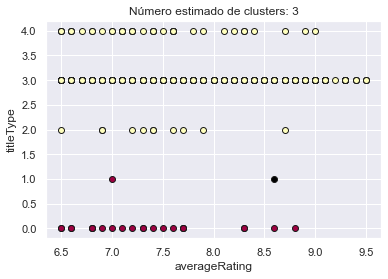

In [922]:
# Graficar los resultados
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro para valores atipicos.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Filtrar los puntos en df_moviesType_rating que pertenecen al cluster k
    xy = df_moviesType_rating[class_member_mask]

    # Graficar los puntos de datos que son "núcleo"
    plt.plot(xy['averageRating'], xy['types'], 'o', 
             markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % len(unique_labels))
plt.xlabel('averageRating')
plt.ylabel('titleType')
plt.show()

Se evidencia claramente, que el tipo de la pelicula,influye en el averageRating de la misma, se puede evidenciar que el valor numero 3.0, es decir  que corresponde a imdbdisplay es quien obtiene los mejores resultados en este analisis de densidad

Analisis por medio del atributo runTimeMinutes

In [923]:
df_runTimeMinutes=df_movies2[['averageRating', 'runtimeMinutes']]
print(df_runTimeMinutes)

      averageRating  runtimeMinutes
0               8.6           137.0
1               6.6            22.0
2               8.5           150.0
3               7.5           120.0
4               6.9           132.0
...             ...             ...
7466            7.3           108.0
7467            7.5            25.0
7468            7.2            99.0
7469            6.9            84.0
7470            7.2            23.0

[7359 rows x 2 columns]


Normalizar

In [924]:
scaler = StandardScaler()

# Normalizar las columnas y actualizar el sub-DataFrame
df_runTimeMinutes = pd.DataFrame(scaler.fit_transform(df_runTimeMinutes), columns=['averageRating', 'runtimeMinutes'])

# Mostrar el DataFrame normalizado
print(df_runTimeMinutes)

      averageRating  runtimeMinutes
0          2.058393        0.556864
1         -1.269568       -1.211062
2          1.891995        0.756716
3          0.228014        0.295518
4         -0.770374        0.479997
...             ...             ...
7354      -0.104782        0.111039
7355       0.228014       -1.164942
7356      -0.271180       -0.027321
7357      -0.770374       -0.257920
7358      -0.271180       -1.195689

[7359 rows x 2 columns]


Aplicacion algoritmo

In [947]:
print(df_runTimeMinutes)
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan.fit(df_runTimeMinutes)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Numero de cluster creado: %d" % n_clusters_)
print("Puntos atipicos: %d" % n_noise_)

      averageRating  runtimeMinutes
0          2.058393        0.556864
1         -1.269568       -1.211062
2          1.891995        0.756716
3          0.228014        0.295518
4         -0.770374        0.479997
...             ...             ...
7354      -0.104782        0.111039
7355       0.228014       -1.164942
7356      -0.271180       -0.027321
7357      -0.770374       -0.257920
7358      -0.271180       -1.195689

[7359 rows x 2 columns]
Numero de cluster creado: 1
Puntos atipicos: 9


In [948]:
coeficienteSilueta = silhouette_score(df_runTimeMinutes, labels)
print(coeficienteSilueta)

0.8212087191496696


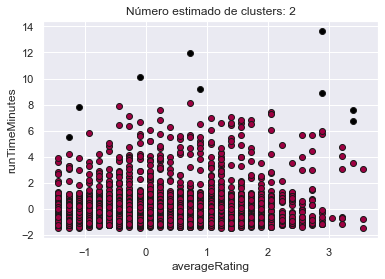

In [949]:
# Graficar los resultados
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro para valores atipicos.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Filtrar los puntos en df_moviesType_rating que pertenecen al cluster k
    xy = df_runTimeMinutes[class_member_mask]

    # Graficar los puntos de datos que son "núcleo"
    plt.plot(xy['averageRating'], xy['runtimeMinutes'], 'o', 
             markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % len(unique_labels))
plt.xlabel('averageRating')
plt.ylabel('runTimeMinutes')
plt.show()

Se evidencia que no hay una relacion significativa entre el rating y los minutos que dura la pelicula

Verificacion de tipo de filme (titleType)

In [950]:
df_titleType=df_movies2[['averageRating', 'titleType']]
print(df_titleType)

      averageRating titleType
0               8.6     movie
1               6.6  tvseries
2               8.5     movie
3               7.5     movie
4               6.9     movie
...             ...       ...
7466            7.3     movie
7467            7.5  tvseries
7468            7.2     movie
7469            6.9     movie
7470            7.2  tvseries

[7359 rows x 2 columns]


In [951]:
le = LabelEncoder()

# Ajusta el LabelEncoder usando la columna 'types' del DataFrame df_moviesType_rating
le.fit(df_titleType['titleType'])

# Crea un diccionario que mapea las clases originales a las etiquetas numéricas
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Imprime el mapeo
print("Mapeo de nombres:", le_name_mapping)



Mapeo de nombres: {'movie': 0, 'tvminiseries': 1, 'tvmovie': 2, 'tvseries': 3}


In [1005]:
print(df_titleType)
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(df_moviesType_rating)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Numero de cluster creado: %d" % n_clusters_)
print("Puntos atipicos: %d" % n_noise_)

      averageRating  titleType
0               8.6          0
1               6.6          3
2               8.5          0
3               7.5          0
4               6.9          0
...             ...        ...
7466            7.3          0
7467            7.5          3
7468            7.2          0
7469            6.9          0
7470            7.2          3

[7359 rows x 2 columns]
Numero de cluster creado: 3
Puntos atipicos: 20


In [1006]:
df_titleType.columns

df_titleType = df_titleType.copy()
df_titleType['titleType'] = labelencoder.fit_transform(df_titleType['titleType'])

print(df_titleType)

      averageRating  titleType
0               8.6          0
1               6.6          3
2               8.5          0
3               7.5          0
4               6.9          0
...             ...        ...
7466            7.3          0
7467            7.5          3
7468            7.2          0
7469            6.9          0
7470            7.2          3

[7359 rows x 2 columns]


Coeficiente silueta

In [1007]:
coeficienteSilueta = silhouette_score(df_titleType, labels)
print(coeficienteSilueta)

-0.2815583335397772


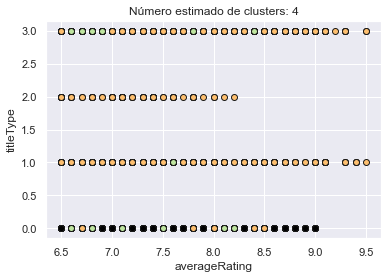

In [1008]:
# Graficar los resultados
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro para valores atipicos.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Filtrar los puntos en df_moviesType_rating que pertenecen al cluster k
    xy = df_titleType[class_member_mask]

    # Graficar los puntos de datos que son "núcleo"
    plt.plot(xy['averageRating'], xy['titleType'], 'o', 
             markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % len(unique_labels))
plt.xlabel('averageRating')
plt.ylabel('titleType')
plt.show()

In [1009]:
df_movies2

,titleType,startYear,runtimeMinutes,averageRating,numVotes,region,types,main_genre,secondary_genre
0,movie,1991.0,137.0,8.6,1128166.0,US,dvd,action,Sci-Fi
1,tvseries,2000.0,22.0,6.6,577.0,US,alternative,action,Adventure
2,movie,2002.0,150.0,8.5,860569.0,US,imdbdisplay,biography,Drama
3,movie,2004.0,120.0,7.5,417391.0,US,imdbdisplay,action,Crime
4,movie,2005.0,132.0,6.9,5946.0,US,imdbdisplay,biography,Drama
...,...,...,...,...,...,...,...,...,...
7466,movie,2019.0,108.0,7.3,3779.0,CA,imdbdisplay,drama,Romance
7467,tvseries,2019.0,25.0,7.5,3318.0,CA,imdbdisplay,animation,Comedy
7468,movie,2019.0,99.0,7.2,3346.0,CA,imdbdisplay,drama,Romance
7469,movie,2019.0,84.0,6.9,3646.0,CA,imdbdisplay,drama,No tiene


El algoritmo, no obtuvo su mejor rendimiento, dado que los datos se encuentran bastantes dispersos, sin embnargo, evidenciamos que los titleType con mayor rating promedio son aquellos que corresponden a 1.0 y 3.0 que respectivamente son tvminiseries y tvseries

Verificacion de la importancia del genero principal en el average rating

In [1010]:
df_maingenre=df_movies2[['averageRating', 'main_genre']]
print(df_maingenre)

      averageRating  main_genre
0               8.6      action
1               6.6      action
2               8.5   biography
3               7.5      action
4               6.9   biography
...             ...         ...
7466            7.3       drama
7467            7.5   animation
7468            7.2       drama
7469            6.9       drama
7470            7.2  reality-tv

[7359 rows x 2 columns]


Mapeo de nombres

In [1011]:
le = LabelEncoder()

# Ajusta el LabelEncoder usando la columna 'types' del DataFrame df_moviesType_rating
le.fit(df_maingenre['main_genre'])

# Crea un diccionario que mapea las clases originales a las etiquetas numéricas
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Imprime el mapeo
print("Mapeo de nombres:", le_name_mapping)

Mapeo de nombres: {'action': 0, 'adventure': 1, 'animation': 2, 'biography': 3, 'comedy': 4, 'crime': 5, 'documentary': 6, 'drama': 7, 'family': 8, 'fantasy': 9, 'game-show': 10, 'history': 11, 'horror': 12, 'music': 13, 'musical': 14, 'mystery': 15, 'reality-tv': 16, 'romance': 17, 'sci-fi': 18, 'sport': 19, 'talk-show': 20, 'thriller': 21}


In [1013]:
df_maingenre = df_maingenre.copy()
df_maingenre['main_genre'] = labelencoder.fit_transform(df_maingenre['main_genre'])

print(df_maingenre)


      averageRating  main_genre
0               8.6           0
1               6.6           0
2               8.5           3
3               7.5           0
4               6.9           3
...             ...         ...
7466            7.3           7
7467            7.5           2
7468            7.2           7
7469            6.9           7
7470            7.2          16

[7359 rows x 2 columns]


In [1014]:
dbscan = DBSCAN(eps=1, min_samples=10)
dbscan.fit(df_maingenre)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Numero de cluster creado: %d" % n_clusters_)
print("Puntos atipicos: %d" % n_noise_)


Numero de cluster creado: 5
Puntos atipicos: 5


Coeficiente silueta:

In [1015]:
coeficienteSilueta = silhouette_score(df_maingenre, labels)
print(coeficienteSilueta)

0.419435404221512


Creacion de visualizacion

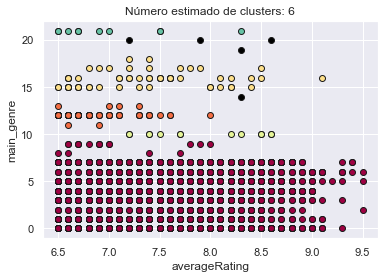

In [1016]:
# Graficar los resultados
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro para valores atipicos.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Filtrar los puntos en df_moviesType_rating que pertenecen al cluster k
    xy = df_maingenre[class_member_mask]

    # Graficar los puntos de datos que son "núcleo"
    plt.plot(xy['averageRating'], xy['main_genre'], 'o', 
             markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % len(unique_labels))
plt.xlabel('averageRating')
plt.ylabel('main_genre')
plt.show()

Se evidencia que los principales generos que mas influyen en el rating son los que se encuentran entre los codigos 0 y 10, lo que quiere decir que son: 'action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'game-show' a la hora de evaluar en rating


Evaluacion de generos secundarios

In [1017]:
df_secondaryGenre=df_movies2[['averageRating', 'secondary_genre']]
print(df_secondaryGenre)


      averageRating secondary_genre
0               8.6          Sci-Fi
1               6.6       Adventure
2               8.5           Drama
3               7.5           Crime
4               6.9           Drama
...             ...             ...
7466            7.3         Romance
7467            7.5          Comedy
7468            7.2         Romance
7469            6.9        No tiene
7470            7.2        No tiene

[7359 rows x 2 columns]


In [1019]:
le = LabelEncoder()

# Ajusta el LabelEncoder usando la columna 'types' del DataFrame df_moviesType_rating
le.fit(df_secondaryGenre['secondary_genre'])

# Crea un diccionario que mapea las clases originales a las etiquetas numéricas
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Imprime el mapeo
print("Mapeo de nombres:", le_name_mapping)


Mapeo de nombres: {'Adventure': 0, 'Animation': 1, 'Biography': 2, 'Comedy': 3, 'Crime': 4, 'Documentary': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'Game-Show': 9, 'History': 10, 'Horror': 11, 'Music': 12, 'Musical': 13, 'Mystery': 14, 'News': 15, 'No tiene': 16, 'Reality-TV': 17, 'Romance': 18, 'Sci-Fi': 19, 'Short': 20, 'Sport': 21, 'Talk-Show': 22, 'Thriller': 23, 'War': 24, 'Western': 25}


Transformacion de variable categorica

In [1021]:
df_secondaryGenre = df_secondaryGenre.copy()
df_secondaryGenre['secondary_genre'] = labelencoder.fit_transform(df_secondaryGenre['secondary_genre'])

print(df_secondaryGenre)


      averageRating  secondary_genre
0               8.6               19
1               6.6                0
2               8.5                6
3               7.5                4
4               6.9                6
...             ...              ...
7466            7.3               18
7467            7.5                3
7468            7.2               18
7469            6.9               16
7470            7.2               16

[7359 rows x 2 columns]


In [1024]:
print(df_secondaryGenre)
dbscan = DBSCAN(eps=1, min_samples=10)
dbscan.fit(df_secondaryGenre)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Numero de cluster creado: %d" % n_clusters_)
print("Puntos atipicos: %d" % n_noise_)



      averageRating  secondary_genre
0               8.6               19
1               6.6                0
2               8.5                6
3               7.5                4
4               6.9                6
...             ...              ...
7466            7.3               18
7467            7.5                3
7468            7.2               18
7469            6.9               16
7470            7.2               16

[7359 rows x 2 columns]
Numero de cluster creado: 1
Puntos atipicos: 1


Coeficiente silueta

In [1025]:
coeficienteSilueta = silhouette_score(df_secondaryGenre, labels)
print(coeficienteSilueta)


0.25431994036138267


Graficar los resultados

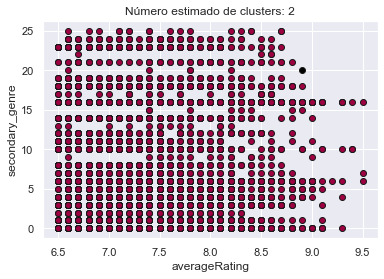

In [1026]:
# Graficar los resultados
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro para valores atipicos.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Filtrar los puntos en df_moviesType_rating que pertenecen al cluster k
    xy = df_secondaryGenre[class_member_mask]

    # Graficar los puntos de datos que son "núcleo"
    plt.plot(xy['averageRating'], xy['secondary_genre'], 'o', 
             markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % len(unique_labels))
plt.xlabel('averageRating')
plt.ylabel('secondary_genre')
plt.show()

Se evidencia quie no hay una tendencia clara a la hora de evaluar el genero secundario del title

Estudio de la relacion entre el numero de votos y el averageRating 

In [1027]:
df_numVotes=df_movies2[['averageRating', 'numVotes']]
print(df_numVotes)


      averageRating   numVotes
0               8.6  1128166.0
1               6.6      577.0
2               8.5   860569.0
3               7.5   417391.0
4               6.9     5946.0
...             ...        ...
7466            7.3     3779.0
7467            7.5     3318.0
7468            7.2     3346.0
7469            6.9     3646.0
7470            7.2     3577.0

[7359 rows x 2 columns]


Estandarizar

In [1077]:
columnas = df_movies2[['averageRating', 'numVotes']]
scaler = StandardScaler()
normalized_columns = scaler.fit_transform(columnas)

print(columnas)

df_numVotes = normalized_columns

      averageRating   numVotes
0          2.058393  1128166.0
1         -1.269568      577.0
2          1.891995   860569.0
3          0.228014   417391.0
4         -0.770374     5946.0
...             ...        ...
7466      -0.104782     3779.0
7467       0.228014     3318.0
7468      -0.271180     3346.0
7469      -0.770374     3646.0
7470      -0.271180     3577.0

[7359 rows x 2 columns]


Implementacion del algoritmo

In [1071]:
dbscan = DBSCAN(eps=0.5, min_samples=1)
dbscan.fit(df_numVotes)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Numero de cluster creado: %d" % n_clusters_)
print("Puntos atipicos: %d" % n_noise_)

Numero de cluster creado: 16
Puntos atipicos: 0


Coeficiente silueta

In [1069]:
coeficienteSilueta = silhouette_score(df_numVotes, labels)
print(coeficienteSilueta)


0.5985388845828927


In [1076]:
# Graficar los resultados
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro para valores atipicos.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Filtrar los puntos en df_moviesType_rating que pertenecen al cluster k
    xy = df_numVotes[class_member_mask]

    # Graficar los puntos de datos que son "núcleo"
    plt.plot(xy['averageRating'], xy['numVotes'], 'o', 
             markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % len(unique_labels))
plt.xlabel('averageRating')
plt.ylabel('titleType')
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Graficar

### 6.1 Preparar los datos
A nivel de preparación de datos debemos fijarnos en:
- A. Correcciones relacionadas con problemas de calidad de dato: nulos, duplicados, inconsistencia, diferencia de formatos, etc.
- B. Preparación relacionada con la tarea de aprendizaje
    - Selección de columnas a incluir de acuerdo con la tarea de aprendizaje a realizar y el conocimiento del contexto del negocio
    - ...
- C. Preparación de acuerdo con el algoritmo a utilizar, en este caso K-means
    Al revisar k-means vemos que el algoritmo trabaja únicamente con datos numéricos, y no nulos así que si vamos a incluir datos categóricos debemos transformarlos a numéricos y si tenemos datos nulos debemos transformalos y en el peor escenario retirarlos del modelo ya sea la fila que los incluye o toda la columna si el porcentaje de estos valores es alto.

### 7 Analizar y concluir